# 数值稳定性和模型初始化
初始化方案在训练神经网络中起着举足轻的作用，糟糕的选择可能会导致我们在训练的时候遭遇梯度爆炸或梯度消失。本节将更详细地讨论这些主题，并讨论一些有用的启发式方法。


## 梯度消失和梯度爆炸
考虑一个具有$L$层、输入$\mathbf{x}$和输出$\omicron$的深层网络。每一层$l$由变换$f_l$定义，该变换的参数为权重$\mathbf{W}^{(l)}$, 其隐藏变量是$\mathbf{h}^{(l)}$（令$\mathbf{h}^{(0)}=\mathbf{x}$）。网络可以表示为：
$$
\mathbf{h}^{(l)} = f_l(\mathbf{h}^{(l-1)} 因此\mathbf{\omicron} =   f_L \circ \cdots \circ f_2 \circ f_1(\mathbf{x})
$$

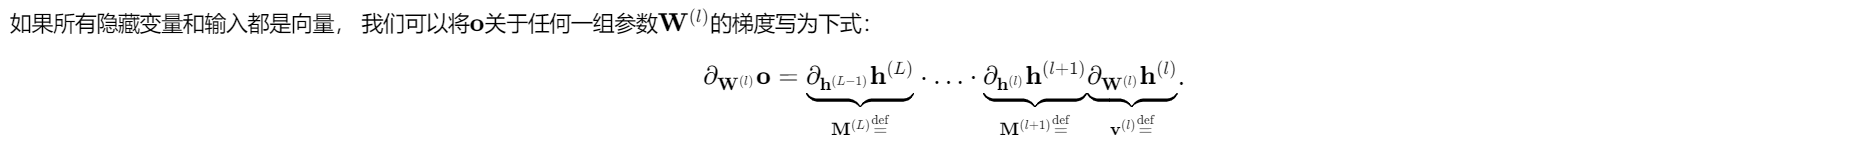

## 梯度消失
sigmoid函数的导数在0附近的梯度很小，导致梯度消失。$\frac{1}{1 + exp(-x)}$。

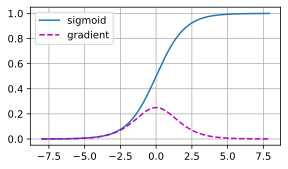

In [1]:
import warnings
from d2l import paddle as d2l

warnings.filterwarnings('ignore')
import paddle

x = paddle.arange(start=-8.0, end=8.0, step=0.1, dtype='float32')
x.stop_gradient = False
y = paddle.nn.functional.sigmoid(x)
y.backward(paddle.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
        legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))




sigmoid函数很大或者很小时，他的梯度都会消失。此外，当反向传播通过很多层时，除非我们在刚刚好的地方，这些地方的sigmoid函数的输入接近于零。否则整个乘积的图可能会消失。当我们的网络有很多层的时候，除非我们很小心，否则在某一层可能会切断梯度。所以使用ReLU函数。

## 梯度爆炸



In [2]:
M = paddle.normal(0, 1, shape=(4,4))
print('一个矩阵 \n', M)
for i in range(100):
    M = paddle.mm(M, paddle.normal(0, 1, shape=(4,4)))

print('乘以100个矩阵之后\n', M)

一个矩阵 
 Tensor(shape=[4, 4], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[-0.12773067, -0.54494023, -0.50025600,  1.32108676],
        [-0.51366520,  1.42157507,  0.14057486, -0.49354917],
        [ 1.11381388, -0.17684320,  0.41410223, -0.59453624],
        [ 0.75586814,  0.10494968,  0.59234071, -0.39670512]])
乘以100个矩阵之后
 Tensor(shape=[4, 4], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[ 8823134183609004273434624.  ,  50163822191314741158215680. ,
         -93051492203451413067464704. , -67758100716204008547549184. ],
        [-23730468037172270622310400. , -134918840519069080685117440.,
          250268028312429688218714112.,  182239775029266203287748608.],
        [-205316566981631075680256.   , -1167329132304354515091456.  ,
          2165340068326959407431680.  ,  1576754040559585709785088.  ],
        [-7315285793808939455873024.  , -41590923855673129986686976. ,
          77149195161862970026229760. ,  56178378484861722035224576. ]])
